In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
df = pd.read_csv("../../data/titanic_toy.csv")

In [19]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [20]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [21]:
X = df.iloc[:,:2]
y = df['Survived']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [25]:
trf.fit(X_train)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('imputer1', ...), ('imputer2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``featu

In [26]:
X_train_imputed= trf.transform(X_train)
X_test_imputed = trf.transform(X_test)

In [27]:
trf.named_transformers_['imputer1'].statistics_,trf.named_transformers_['imputer2'].statistics_

(array([28.]), array([32.51778772]))

In [32]:
X_train_imputed

array([[ 45.5       ,  28.5       ],
       [ 23.        ,  13.        ],
       [ 32.        ,   7.925     ],
       ...,
       [ 41.        ,  32.51778772],
       [ 14.        , 120.        ],
       [ 21.        ,  77.2875    ]], shape=(712, 2))

Generally, variance reduces as the imputation is done (since we are replacing missing values with mean/median). But if it decreases significantly then it's a sign that the imputation method may not be appropriate for the data. A significant reduction in variance can indicate that the imputed values are too similar to each other, which can lead to biased results in subsequent analyses.

In [40]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train_imputed[:,0].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation: ', X_train_imputed[:,1].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  168.96965935409042
Original Fare variable variance:  2761.0314349486343
Fare Variance after mean imputation:  2617.5508688066407


In [42]:
# change X_train_imputed to dataframe from numpy array for plotting.
X_train_imputed = pd.DataFrame({
    'Age':X_train_imputed[:,0],
    'Fare':X_train_imputed[:,1]
})

In [44]:
X_train_imputed

,Age,Fare
0,45.5,28.500000
1,23.0,13.000000
2,32.0,7.925000
3,26.0,7.854200
4,6.0,31.275000
...,...,...
707,21.0,7.650000
708,28.0,31.000000
709,41.0,32.517788
710,14.0,120.000000


The distribution also changes after imputation. Since age had higher missing values, imputing it caused a significant change in its distribution. But fare had less missing values, so its distribution didn't change much after imputation.
The conclusion is we will have to find another method for age but fare is fine with mean imputation.

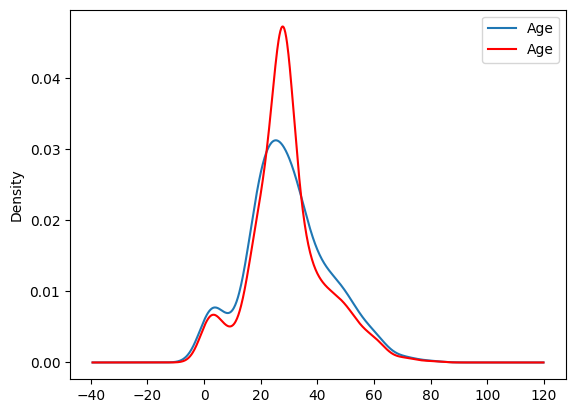

In [45]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train_imputed['Age'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

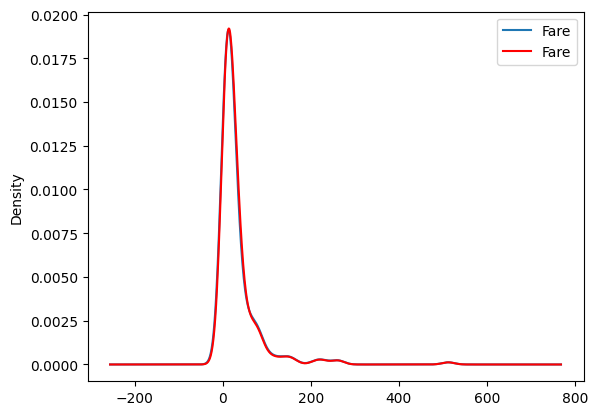

In [46]:

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train_imputed['Fare'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')